In [9]:
import math
import networkx as nx
import  matplotlib.pyplot as plt

In [2]:
def get_down_left_point(points):
    points = sorted(points, key=lambda lst: lst[1])
    down_left_point = points[0]
    for point in points:
        if point[1] != down_left_point[1]:
            break
        if point[0] < down_left_point[0]:
            down_left_point = point
    return down_left_point

In [3]:
def angle(point_1, point_2):
    delta_x = (point_2[0] - point_1[0])
    delta_y = (point_2[1] - point_1[1])

    tan = delta_y / (delta_x + 1e-10)
    arctan = math.atan(tan)
    if arctan < 0:
        arctan += math.pi
    return arctan

In [4]:
def get_edge(base_point, sort_angle_points):
    first_space, second_space = [], []
    second = False
    white, black = 0, 0
    for point in sort_angle_points:
        if point[2] == base_point[2]:
            black += 1
        else:
            if white == black:
                if not second:
                    white_point = point
                    second = True
            else:
                white += 1
        if second:
            second_space.append(point)
        else:
            first_space.append(point)
    return white_point, first_space, second_space[1:]

In [5]:
def make_pairs(points):
    base_point = get_down_left_point(points)
    points.remove(base_point)
    points = sorted(points, key=lambda p: angle(base_point, p))
    white_point, first_space, second_space = get_edge(base_point, points)
    res = [(base_point, white_point)]
    if len(first_space) > 0:
        res += make_pairs(first_space)
    if len(second_space) > 0:
        res += make_pairs(second_space)
    return res

In [6]:
def plot_points(pairs, file):
    G = nx.Graph()

    for pair in pairs:
        black = pair[0] if pair[0][2] == 1 else pair[1]
        white = pair[1] if pair[0][2] == 1 else pair[0]
        black_node = str(black[-1]) + ' b'
        G.add_node(black_node, pos=black[:2])
        white_node = str(white[-1]) + ' w'
        G.add_node(white_node, pos=white[:2])
        G.add_edge(black_node, white_node)

    plt.figure(figsize=(10, 10))
    plt.title(file)
    pos = nx.circular_layout(G)
    options = {
        'node_size': 500,
        'font_size' : 10
    }

    color_map = []
    for node in G:
        if node[-1] == 'b':
            color_map.append('gray')
        else:
            color_map.append('white')

    nx.draw(G, nx.get_node_attributes(G, 'pos'), node_color=color_map, with_labels=True,  **options)

    ax = plt.gca()
    ax.collections[0].set_edgecolor("#000000")
    #plt.show()

In [7]:
files = ['3.txt', '3-2.txt', '33-1.txt', '33-2.txt', '333.txt', '3333_float.txt']

pairs_all = []
for file in files:
    f = open(file)
    n = int(f.readline())
    points = []
    for i in range(n):
        idx, x, y, clas = f.readline().split()
        points.append([float(x), float(y), int(clas), int(idx)])

    pairs = make_pairs(points)
    pairs_all.append(pairs)
    leng = 0
    for pair in pairs:
        leng += ((pair[0][0] - pair[1][0])**2 + (pair[0][1] - pair[1][1])**2)**(0.5)
    with open(file[:-4] + '_res.txt', 'w') as f:
        f.write(str(len(pairs)) + '\n')
        f.write(str(leng // len(pairs)) + '\n')
        for pair in pairs:
            f.write(str(pair[0][-1]) + ' ' + str(pair[1][-1]) + '\n')

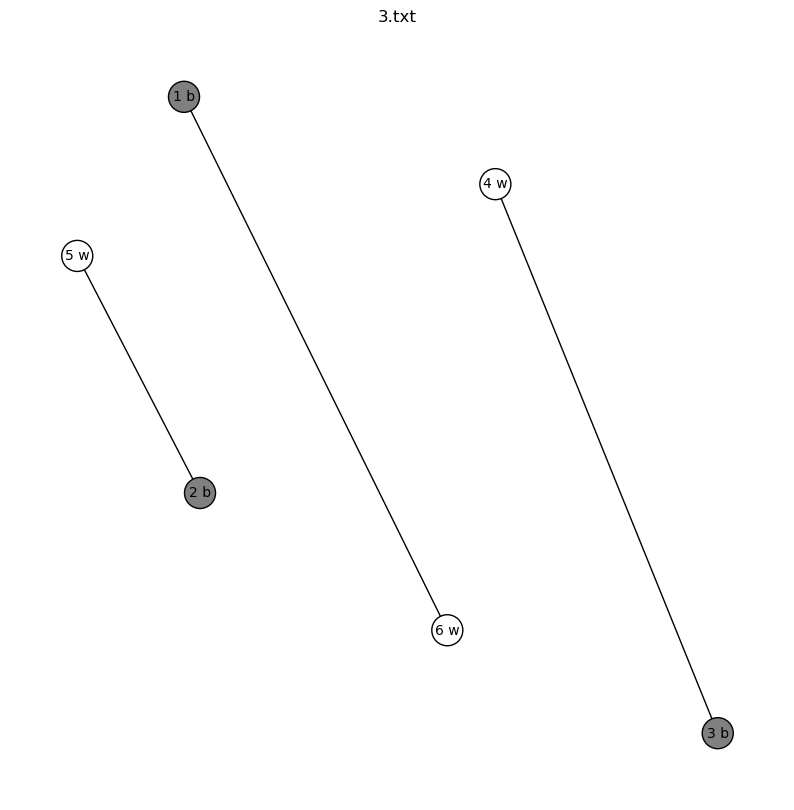

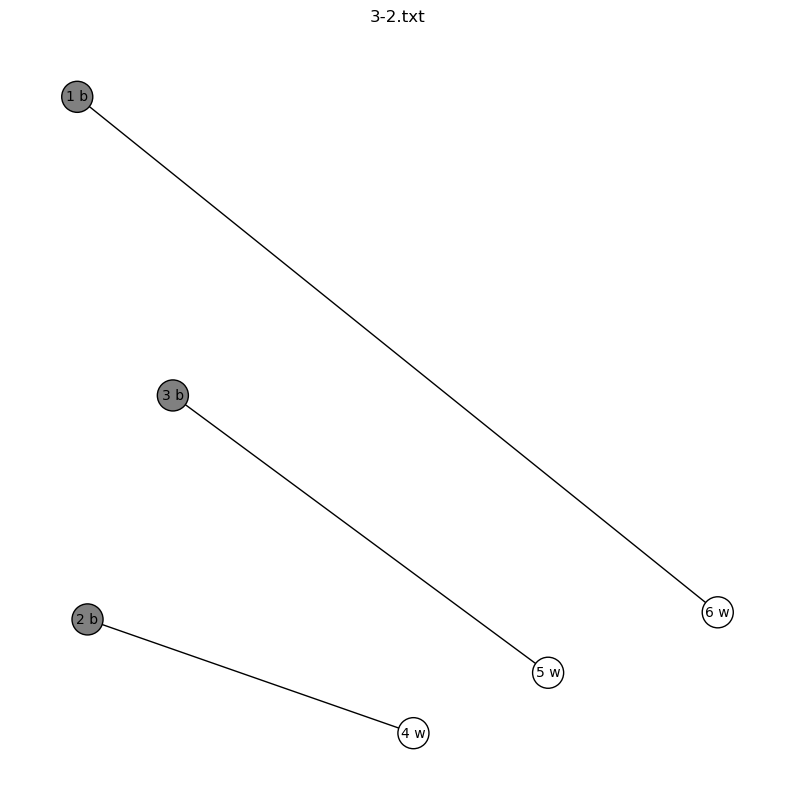

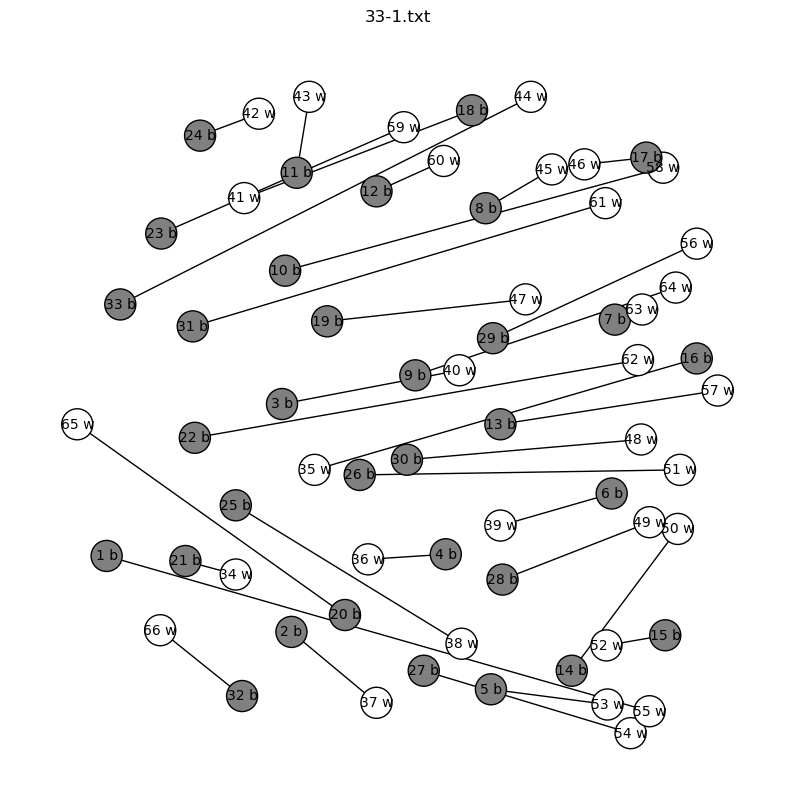

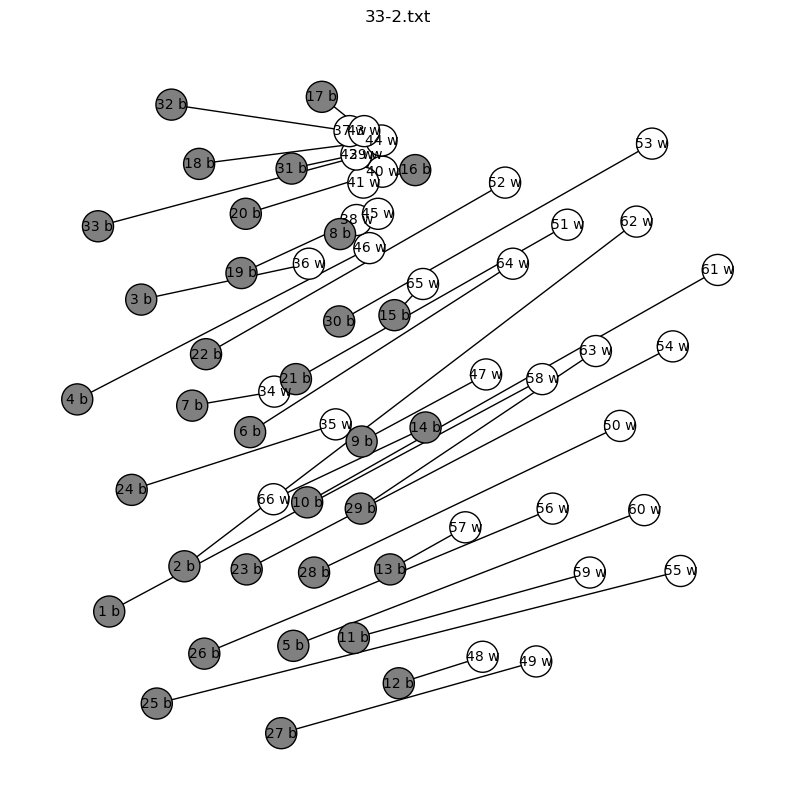

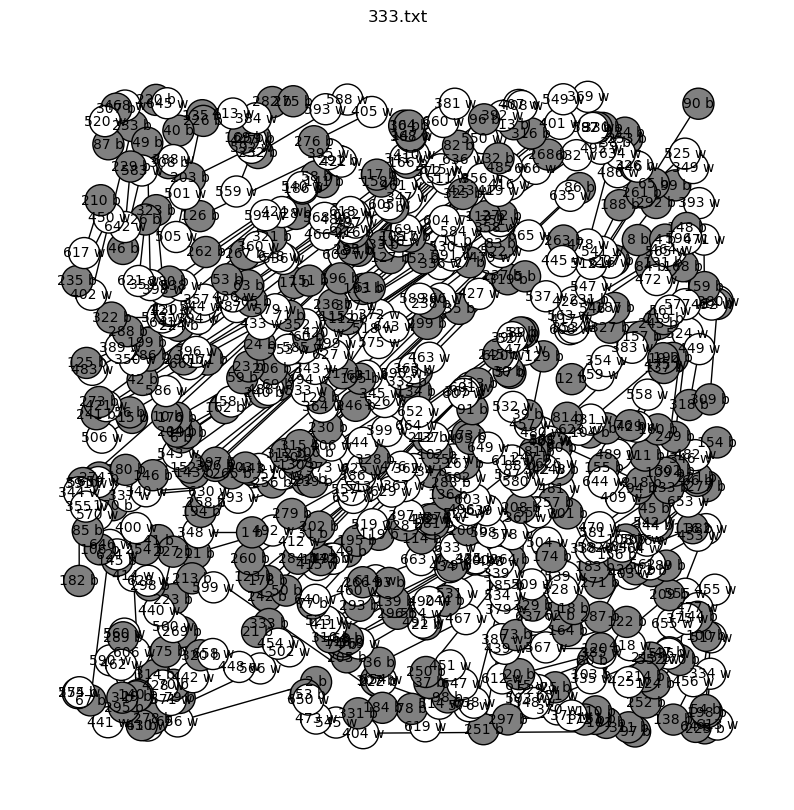

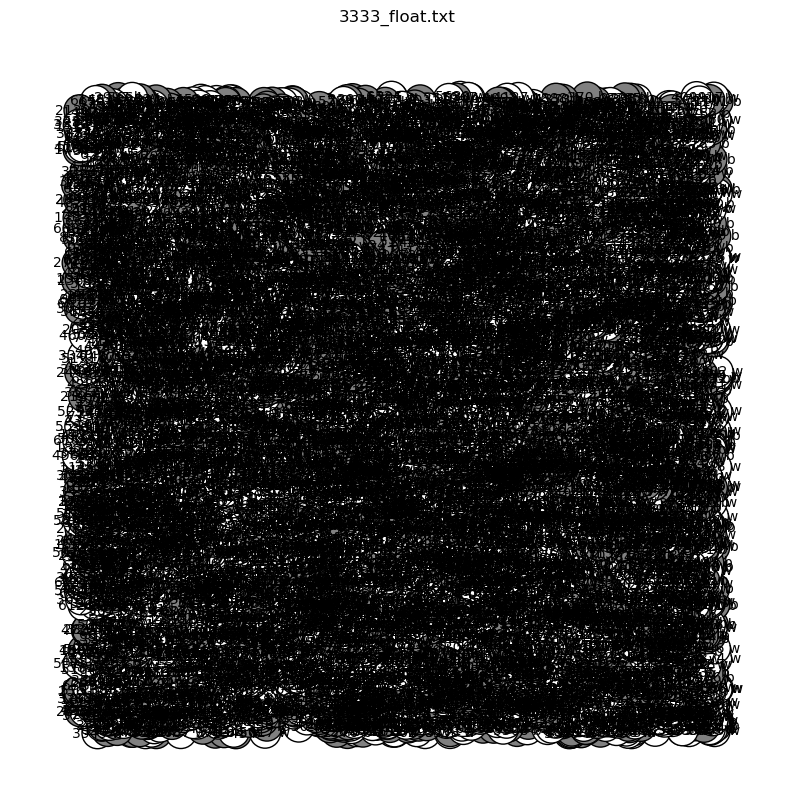

In [8]:
for file, pairs in zip(files, pairs_all):
    plot_points(pairs, file)
    plt.savefig(file[:-4] + '_res.pdf')